# Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from keras.src.metrics.accuracy_metrics import accuracy
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, adjusted_rand_score, f1_score, roc_curve, auc, roc_auc_score, r2_score, log_loss
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, label_binarize
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

# EDA

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

df = pd.read_csv("/content/drive/MyDrive/Project/software_quality_dataset.csv")

Mounted at /content/drive


In [ ]:
df.sample(10)

,Lines_of_Code,Cyclomatic_Complexity,Num_Functions,Code_Churn,Comment_Density,Num_Bugs,Has_Unit_Tests,Code_Owner_Experience,Quality_Label
250,815.0,29,96,113.367652,0.183997,6,Yes,7,Low
163,4991.0,34,20,156.065651,0.285667,3,Yes,1,Low
1177,1475.0,22,144,119.274981,0.238881,2,Yes,2,High
886,7897.0,3,161,157.182541,0.552813,5,Yes,3,Medium
515,6767.0,5,66,53.870368,0.418560,2,Yes,8,Low
690,NaN,14,14,108.886203,0.672384,2,No,6,Medium
839,712.0,33,112,161.911599,0.847717,3,Yes,9,Medium
903,1080.0,10,97,58.926603,0.682376,1,No,1,Medium
1192,559.0,19,34,113.839907,0.871938,6,No,4,High
725,5166.0,15,71,NaN,0.765745,3,Yes,3,Medium


In [ ]:
sl = df.shape
print(f"Data Sample : {sl[0]}")
print(f"Length of data points : {sl[1]}")

Data Sample : 1600
Length of data points : 9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Lines_of_Code          1520 non-null   float64
 1   Cyclomatic_Complexity  1600 non-null   int64  
 2   Num_Functions          1600 non-null   int64  
 3   Code_Churn             1520 non-null   float64
 4   Comment_Density        1520 non-null   float64
 5   Num_Bugs               1600 non-null   int64  
 6   Has_Unit_Tests         1600 non-null   object 
 7   Code_Owner_Experience  1600 non-null   int64  
 8   Quality_Label          1600 non-null   object 
dtypes: float64(3), int64(4), object(2)
memory usage: 112.6+ KB


In [ ]:
df.describe()

,Lines_of_Code,Cyclomatic_Complexity,Num_Functions,Code_Churn,Comment_Density,Num_Bugs,Code_Owner_Experience
count,1520.000000,1600.000000,1600.000000,1520.000000,1520.000000,1600.000000,1600.000000
mean,4939.269737,25.076875,103.178125,102.572291,0.549370,2.934375,5.045000
std,2867.248259,13.879621,55.503710,50.546329,0.256137,1.715928,2.559701
min,106.000000,1.000000,5.000000,-64.283310,0.101037,0.000000,1.000000
25%,2490.750000,13.000000,56.000000,67.509852,0.337596,2.000000,3.000000
50%,4860.000000,25.000000,104.000000,104.007452,0.542108,3.000000,5.000000
75%,7455.250000,37.000000,152.000000,138.619113,0.765766,4.000000,7.000000
max,9998.000000,49.000000,199.000000,295.139936,0.999976,10.000000,9.000000


In [ ]:
##Selecting numerical features
numerical_data = df.select_dtypes(include='number')

#append the features of numerical_data to list
numerical_features=numerical_data.columns.tolist()

print(f'There are {len(numerical_features)} numerical features:', '\n')
print(numerical_features)

There are 7 numerical features: 

['Lines_of_Code', 'Cyclomatic_Complexity', 'Num_Functions', 'Code_Churn', 'Comment_Density', 'Num_Bugs', 'Code_Owner_Experience']


In [ ]:
# Transposed stats for numerical features
numerical_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Lines_of_Code,1520.0,4939.269737,2867.248259,106.000000,2490.750000,4860.000000,7455.250000,9998.000000
Cyclomatic_Complexity,1600.0,25.076875,13.879621,1.000000,13.000000,25.000000,37.000000,49.000000
Num_Functions,1600.0,103.178125,55.503710,5.000000,56.000000,104.000000,152.000000,199.000000
Code_Churn,1520.0,102.572291,50.546329,-64.283310,67.509852,104.007452,138.619113,295.139936
Comment_Density,1520.0,0.549370,0.256137,0.101037,0.337596,0.542108,0.765766,0.999976
Num_Bugs,1600.0,2.934375,1.715928,0.000000,2.000000,3.000000,4.000000,10.000000
Code_Owner_Experience,1600.0,5.045000,2.559701,1.000000,3.000000,5.000000,7.000000,9.000000


In [ ]:
#Selecting categoricalfeatures
categorical_data=df.select_dtypes(include= 'object')

#append the features of categorical_data to list
categorical_features=categorical_data.columns.tolist()

print(f'There are {len(categorical_features)} categorical features:', '\n')
print(categorical_features)

There are 2 categorical features: 

['Has_Unit_Tests', 'Quality_Label']


In [ ]:
# Transposed stats for categorical features
categorical_data.describe().T

,count,unique,top,freq
Has_Unit_Tests,1600,2,No,820
Quality_Label,1600,3,High,566


In [ ]:
target = "Quality_Label"

Class Distribution:
Quality_Label
High      566
Low       533
Medium    501
Name: count, dtype: int64

Is the dataset balanced?: False


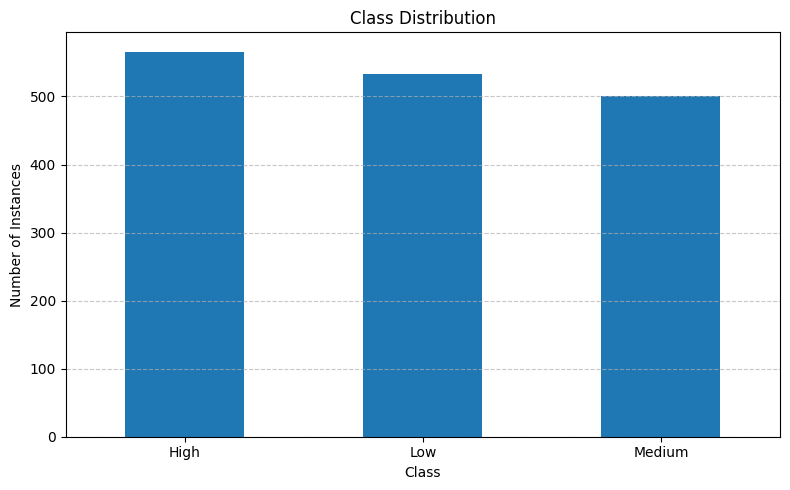

In [ ]:
# Count the number of instances per class
class_counts = df[target].value_counts().sort_index()

# Check balance
is_balanced = class_counts.nunique() == 1

print("Class Distribution:")
print(class_counts)
print("\nIs the dataset balanced?:", is_balanced)

# Bar chart
plt.figure(figsize=(8, 5))
class_counts.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Instances')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Data Preprocessing

## Null / Missing Values

In [ ]:
# Count of missing values
missing_count = df.isnull().sum()
print(missing_count)

Lines_of_Code            80
Cyclomatic_Complexity     0
Num_Functions             0
Code_Churn               80
Comment_Density          80
Num_Bugs                  0
Has_Unit_Tests            0
Code_Owner_Experience     0
Quality_Label             0
dtype: int64


In [ ]:
# Percentage of missing values
missing_percent = (df.isnull().sum() / len(df)) * 100

# Combine into a single table
missing_df = pd.DataFrame({
    "missing_count": missing_count,
    "missing_percent": missing_percent.round(2)
}).sort_values(by="missing_percent", ascending=False)

print(missing_df)

                       missing_count  missing_percent
Lines_of_Code                     80              5.0
Comment_Density                   80              5.0
Code_Churn                        80              5.0
Num_Functions                      0              0.0
Cyclomatic_Complexity              0              0.0
Num_Bugs                           0              0.0
Has_Unit_Tests                     0              0.0
Code_Owner_Experience              0              0.0
Quality_Label                      0              0.0


In [ ]:
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype == "object":
            mode_value = df[col].mode()[0]
            df[col] = df[col].fillna(mode_value)  # Replace with mode for categorical
        else:
            median_value = df[col].median()
            df[col] = df[col].fillna(median_value)  # Replace with median for numerical

## Encoding

In [ ]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Convert all categorical columns to numerical
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = label_encoder.fit_transform(df[col])

df.head()

,Lines_of_Code,Cyclomatic_Complexity,Num_Functions,Code_Churn,Comment_Density,Num_Bugs,Has_Unit_Tests,Code_Owner_Experience,Quality_Label
0,356.0,31,144,69.567047,0.467561,2,1,4,2
1,227.0,15,104,131.844422,0.795643,2,0,5,0
2,9674.0,47,141,118.729027,0.316839,5,0,1,0
3,6967.0,42,107,194.397155,0.971883,5,1,3,1
4,7954.0,35,114,69.202293,0.559417,1,0,8,2


## Correlation Heatmap

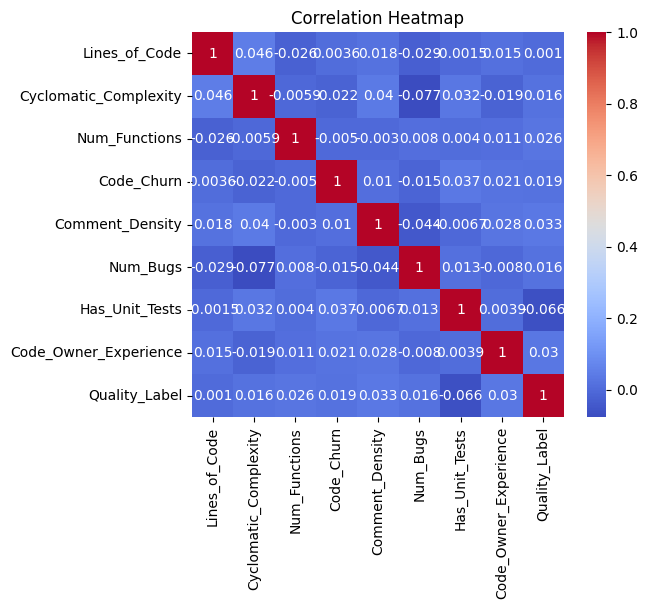

In [ ]:
corrMatrix = df.corr()
plt.figure(figsize=(6, 5))
sns.heatmap(corrMatrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

## Scaling

In [ ]:
x = df.drop(target, axis=1)
y = df[target]

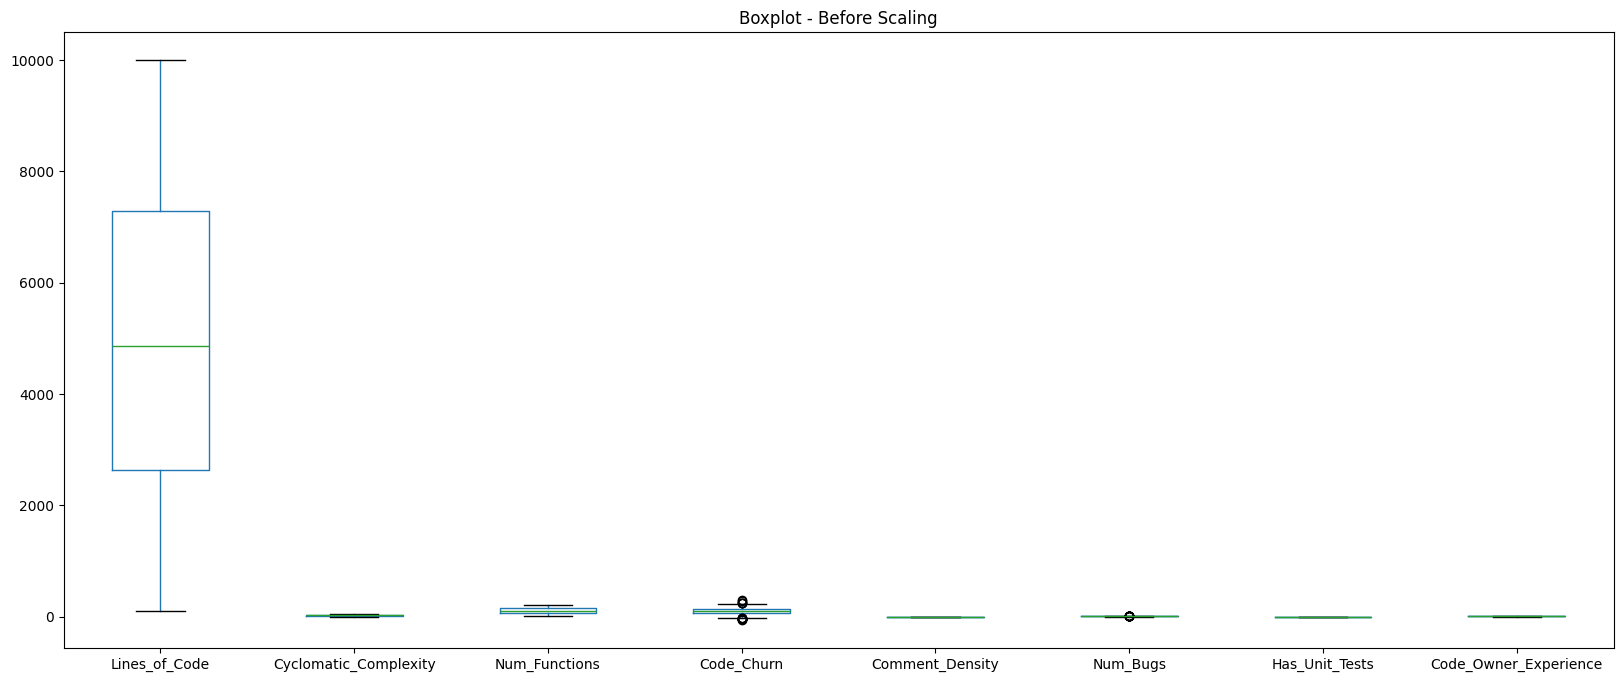

In [ ]:
# Boxplot to visualize the distribution of multiple columns in the DataFrame
plt.figure(figsize=(20, 8))
x.boxplot(grid=False)
plt.title('Boxplot - Before Scaling')
plt.show()

In [ ]:
# Scaling
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
x = pd.DataFrame(x_scaled, columns=x.columns, index=x.index)
df.head()

,Lines_of_Code,Cyclomatic_Complexity,Num_Functions,Code_Churn,Comment_Density,Num_Bugs,Has_Unit_Tests,Code_Owner_Experience,Quality_Label
0,356.0,31,144,69.567047,0.467561,2,1,4,2
1,227.0,15,104,131.844422,0.795643,2,0,5,0
2,9674.0,47,141,118.729027,0.316839,5,0,1,0
3,6967.0,42,107,194.397155,0.971883,5,1,3,1
4,7954.0,35,114,69.202293,0.559417,1,0,8,2


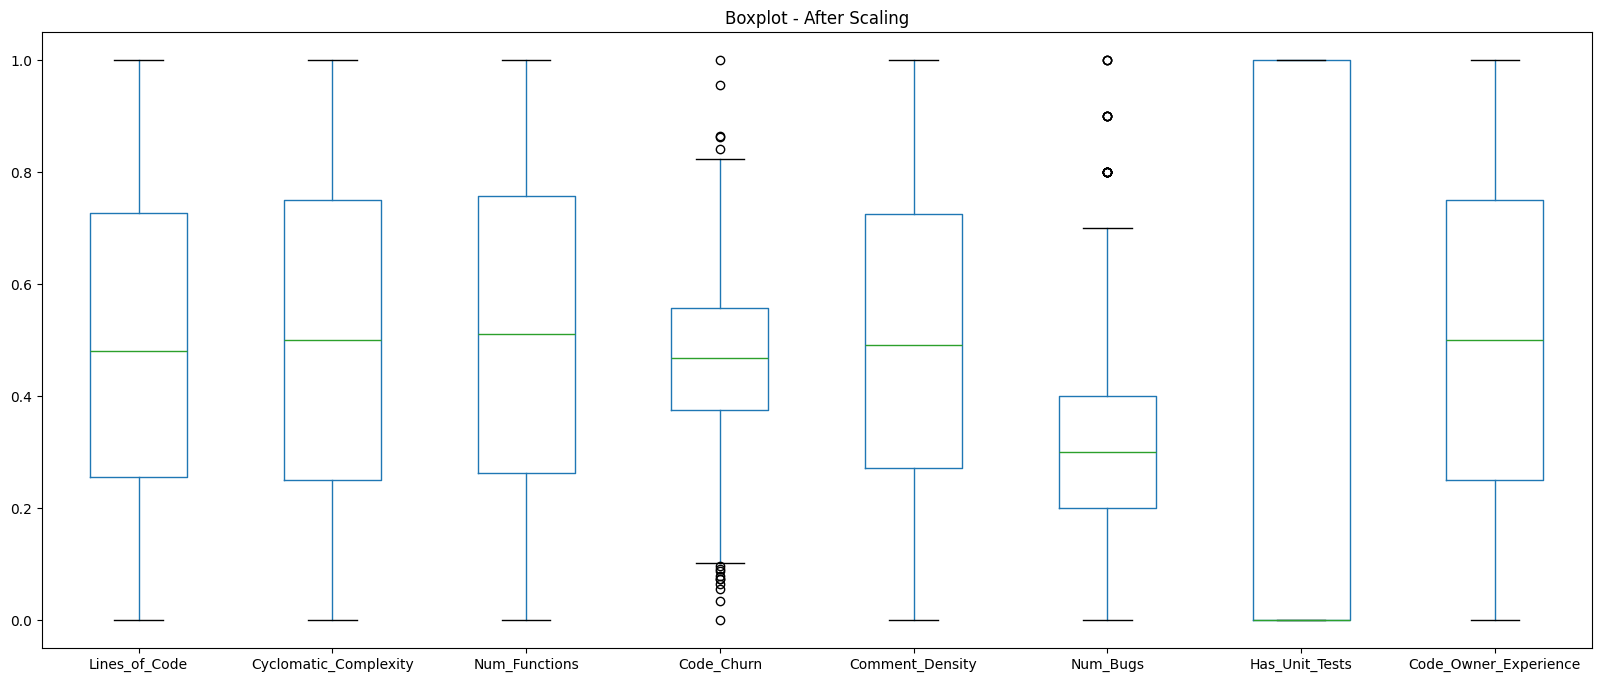

In [ ]:
# Boxplot to visualize the distribution of multiple columns in the DataFrame
plt.figure(figsize=(20, 8))
x.boxplot(grid=False)
plt.title('Boxplot - After Scaling')
plt.show()

# Spliting, Train and Testing

In [ ]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.3, stratify=y, random_state=42)

In [ ]:
xTrain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1120 entries, 1076 to 342
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Lines_of_Code          1120 non-null   float64
 1   Cyclomatic_Complexity  1120 non-null   float64
 2   Num_Functions          1120 non-null   float64
 3   Code_Churn             1120 non-null   float64
 4   Comment_Density        1120 non-null   float64
 5   Num_Bugs               1120 non-null   float64
 6   Has_Unit_Tests         1120 non-null   float64
 7   Code_Owner_Experience  1120 non-null   float64
dtypes: float64(8)
memory usage: 78.8 KB


In [ ]:
xTest.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 377 to 925
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Lines_of_Code          480 non-null    float64
 1   Cyclomatic_Complexity  480 non-null    float64
 2   Num_Functions          480 non-null    float64
 3   Code_Churn             480 non-null    float64
 4   Comment_Density        480 non-null    float64
 5   Num_Bugs               480 non-null    float64
 6   Has_Unit_Tests         480 non-null    float64
 7   Code_Owner_Experience  480 non-null    float64
dtypes: float64(8)
memory usage: 33.8 KB


In [ ]:
yTrain.info()

<class 'pandas.core.series.Series'>
Index: 1120 entries, 1076 to 342
Series name: Quality_Label
Non-Null Count  Dtype
--------------  -----
1120 non-null   int64
dtypes: int64(1)
memory usage: 17.5 KB


In [ ]:
yTest.info()

<class 'pandas.core.series.Series'>
Index: 480 entries, 377 to 925
Series name: Quality_Label
Non-Null Count  Dtype
--------------  -----
480 non-null    int64
dtypes: int64(1)
memory usage: 7.5 KB


# Models

In [ ]:
# Decision Tree
modelDT = DecisionTreeClassifier()
modelDT.fit(xTrain, yTrain)

ypredDT = modelDT.predict(xTest)

# Accuracy
accuracyDT = round(accuracy_score(yTest, ypredDT) * 100, 2)

print("Decision Tree Accuracy:", accuracyDT)

Decision Tree Accuracy: 32.08


In [ ]:
# Naive Bayes
modelNB = GaussianNB()
modelNB.fit(xTrain, yTrain)

ypredNB = modelNB.predict(xTest)

# accuracy
accuracyNB = round(accuracy_score(yTest, ypredNB) * 100, 2)

print("Naive Bayes Accuracy:", accuracyNB)

Naive Bayes Accuracy: 35.42


In [ ]:
# Neural Network
num_classes = len(np.unique(y))

if num_classes > 2:
    yTrainNN = tf.keras.utils.to_categorical(yTrain, num_classes)
    yTestNN = tf.keras.utils.to_categorical(yTest, num_classes)

modelNN = Sequential([
    Input(shape=(xTrain.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(num_classes, activation='softmax' if num_classes > 2 else 'sigmoid')
])
modelNN.compile(
    optimizer='adam',
    loss='categorical_crossentropy' if num_classes > 2 else 'binary_crossentropy',
    metrics=['accuracy']
)
history = modelNN.fit(
    xTrain,
    yTrainNN,
    epochs=42,
    batch_size=32,
    validation_split=0.3
)

Epoch 1/42
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.3633 - loss: 1.0998 - val_accuracy: 0.3333 - val_loss: 1.1020
Epoch 2/42
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3818 - loss: 1.0957 - val_accuracy: 0.3333 - val_loss: 1.0986
Epoch 3/42
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3835 - loss: 1.0941 - val_accuracy: 0.3512 - val_loss: 1.0991
Epoch 4/42
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3731 - loss: 1.0936 - val_accuracy: 0.3452 - val_loss: 1.0984
Epoch 5/42
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3864 - loss: 1.0883 - val_accuracy: 0.3542 - val_loss: 1.0987
Epoch 6/42
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3915 - loss: 1.0912 - val_accuracy: 0.3512 - val_loss: 1.0988
Epoch 7/42
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3854 - loss: 1.0849 - val_accuracy: 0.3482 - val_loss: 1.0985
Epoch 8/42
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3842 - loss: 1.0894 - val_accuracy: 0.3452 - val_loss

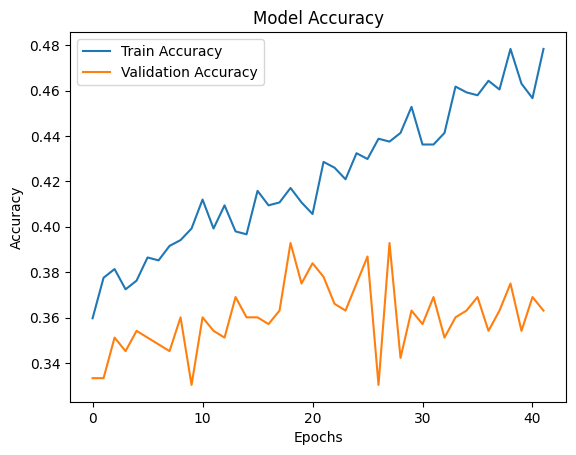

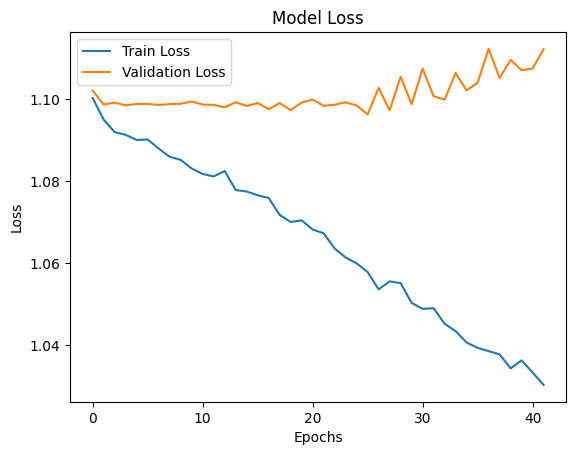

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()

In [ ]:
# Evaluate
test_loss, test_accuracy_NN = modelNN.evaluate(xTest, yTestNN)
accuracyNN = round((test_accuracy_NN * 100), 2)
print(f"Test Accuracy: {accuracyNN}")

# Predictions
y_pred_NN = modelNN.predict(xTest)
y_pred_NN = tf.argmax(y_pred_NN, axis=1).numpy()

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2900 - loss: 1.1473 
Test Accuracy: 29.79
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 



KMeans — Adjusted Rand Index (vs. true labels): 0.0024

Cross-tab (True Label vs Cluster):
Cluster    0    1    2
True                  
0        132  136  298
1        139  135  259
2        140  138  223


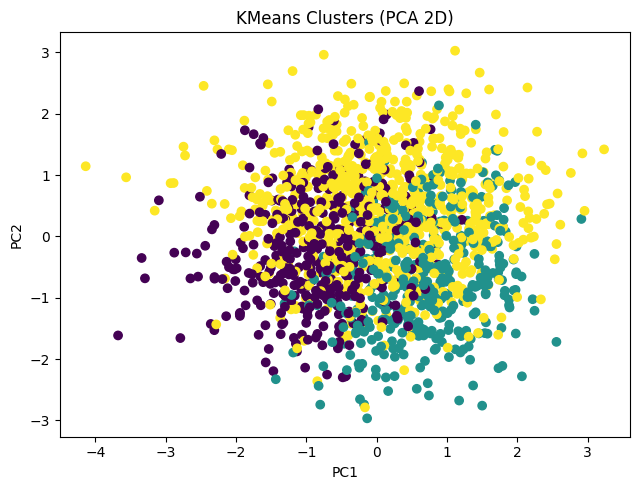

In [ ]:
# ==== Unsupervised Learning: KMeans + PCA Visualization ====
# KMeans pipeline with scaling
kmeans_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("kmeans", KMeans(n_clusters=3, n_init=10, random_state=40))
])

clusters = kmeans_pipe.fit_predict(x)

# Compare clusters vs. true labels (label-invariant metric)
ari = adjusted_rand_score(y, clusters)
print(f"\nKMeans — Adjusted Rand Index (vs. true labels): {ari:.4f}")

print("\nCross-tab (True Label vs Cluster):")
print(pd.crosstab(pd.Series(y, name="True"), pd.Series(clusters, name="Cluster")))

# Visualize clusters via PCA (2D projection)
pca = PCA(n_components=2)
x_pca = pca.fit_transform(StandardScaler().fit_transform(x))

plt.figure(figsize=(6.5,5))
plt.scatter(x_pca[:,0], x_pca[:,1], c=clusters, cmap='viridis')
plt.title("KMeans Clusters (PCA 2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.tight_layout()
plt.show()

# Model Comparison

## Precision, Recall, F1-Score

In [ ]:
# Generate classification reports
report_dt = classification_report(yTest, ypredDT, output_dict=True)
report_nb = classification_report(yTest, ypredNB, output_dict=True)
report_nn = classification_report(yTest, y_pred_NN, output_dict=True)

print(f"Decision Tress :\n{report_dt}\n")
print(f"Naive Bayes : \n{report_nb}\n")
print(f"Neural Network : \n{report_nn}\n")

comparison = {
    'Model': ['Decision Tree', 'Naive Bayes', 'Neural Network'],
    'Precision': [
        report_dt['macro avg']['precision'],
        report_nb['macro avg']['precision'],
        report_nn['macro avg']['precision']
    ],
    'Recall': [
        report_dt['macro avg']['recall'],
        report_nb['macro avg']['recall'],
        report_nn['macro avg']['recall']
    ],
    'F1-Score': [
        report_dt['macro avg']['f1-score'],
        report_nb['macro avg']['f1-score'],
        report_nn['macro avg']['f1-score']
    ]
}

comparison_df = pd.DataFrame(comparison)
print(comparison_df)

Decision Tress :
{'0': {'precision': 0.3619631901840491, 'recall': 0.34705882352941175, 'f1-score': 0.35435435435435436, 'support': 170.0}, '1': {'precision': 0.34810126582278483, 'recall': 0.34375, 'f1-score': 0.34591194968553457, 'support': 160.0}, '2': {'precision': 0.25157232704402516, 'recall': 0.26666666666666666, 'f1-score': 0.2588996763754045, 'support': 150.0}, 'accuracy': 0.32083333333333336, 'macro avg': {'precision': 0.32054559435028634, 'recall': 0.3191584967320262, 'f1-score': 0.3197219934717645, 'support': 480.0}, 'weighted avg': {'precision': 0.3228454039990369, 'recall': 0.32083333333333336, 'f1-score': 0.32171063259632593, 'support': 480.0}}

Naive Bayes : 
{'0': {'precision': 0.37872340425531914, 'recall': 0.5235294117647059, 'f1-score': 0.43950617283950616, 'support': 170.0}, '1': {'precision': 0.32727272727272727, 'recall': 0.3375, 'f1-score': 0.3323076923076923, 'support': 160.0}, '2': {'precision': 0.3375, 'recall': 0.18, 'f1-score': 0.23478260869565218, 'support

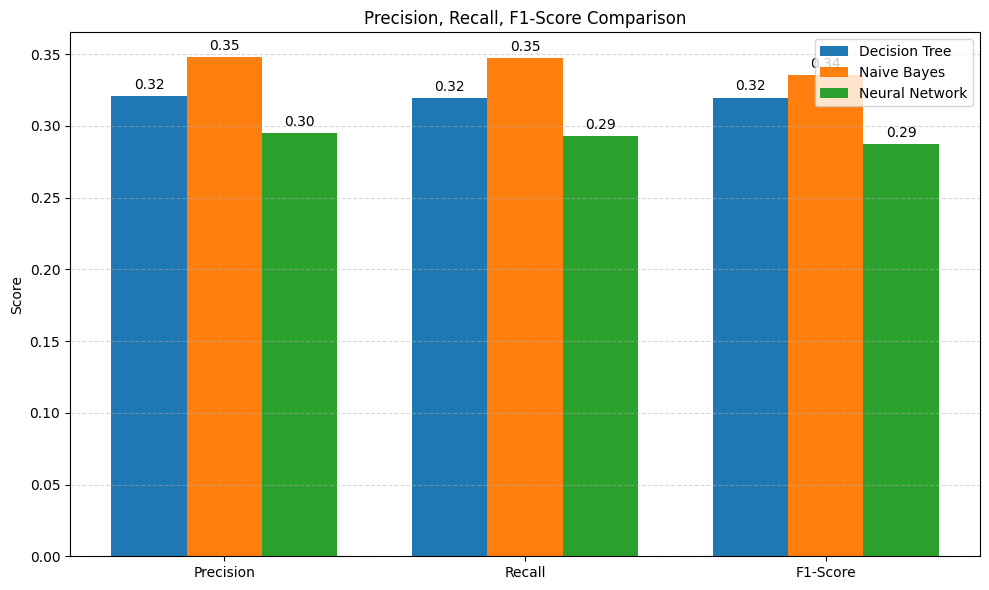

In [ ]:
# Plotting the comparison
metrics = ['Precision', 'Recall', 'F1-Score']
x = np.arange(len(metrics))  # [0, 1, 2]
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))

# Bar positions for each model
bars1 = ax.bar(x - width, comparison_df.iloc[0, 1:], width, label='Decision Tree')
bars2 = ax.bar(x, comparison_df.iloc[1, 1:], width, label='Naive Bayes')
bars3 = ax.bar(x + width, comparison_df.iloc[2, 1:], width, label='Neural Network')

# Labels and titles
ax.set_ylabel('Score')
ax.set_title('Precision, Recall, F1-Score Comparison')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Add value labels on top of bars
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

## Accuracy

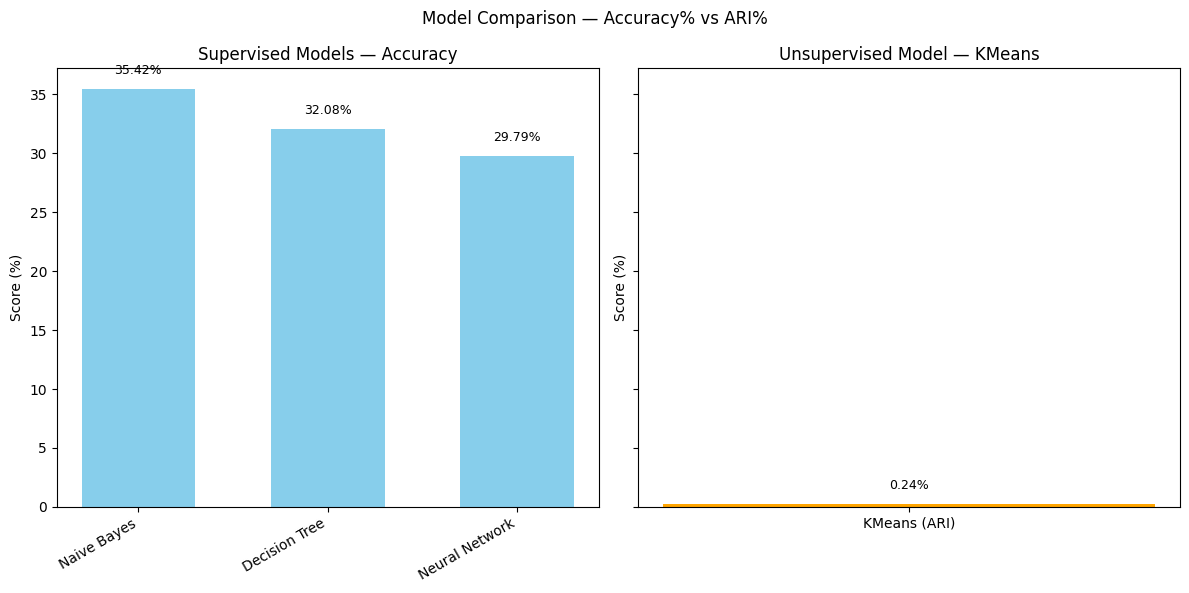


=== Supervised Model Performance Leaderboard ===
Naive Bayes          | Accuracy: 35.42%
Decision Tree        | Accuracy: 32.08%
Neural Network       | Accuracy: 29.79%

=== Unsupervised Model (KMeans) ===
KMeans (ARI): 0.24%


In [ ]:
# === Supervised Accuracy Results ===
results = {
    "Model": ["Decision Tree", "Naive Bayes", "Neural Network"],
    "Accuracy (%)": [accuracyDT, accuracyNB, accuracyNN]
}

# Convert to DataFrame
sup_df = pd.DataFrame(results)

# Sort by Accuracy
sup_df = sup_df.sort_values("Accuracy (%)", ascending=False).reset_index(drop=True)

# === KMeans ARI (Unsupervised), converted to %
ari_percent = round(ari * 100, 2)

# === Side-by-side Bar Plots ===
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Left Plot: Supervised Models (Accuracy)
x = np.arange(len(sup_df["Model"]))
width = 0.6

bars = axes[0].bar(x, sup_df["Accuracy (%)"], width, color="skyblue")
axes[0].set_title("Supervised Models — Accuracy")
axes[0].set_ylabel("Score (%)")
axes[0].set_xticks(x)
axes[0].set_xticklabels(sup_df["Model"], rotation=30, ha="right")

# Annotate accuracy bars
for bar in bars:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2, height + 1,
                 f"{height:.2f}%", ha='center', va='bottom', fontsize=9)

# Right Plot: Unsupervised Model (KMeans ARI)
bars_kmeans = axes[1].bar(["KMeans (ARI)"], [ari_percent], color="orange")
axes[1].set_title("Unsupervised Model — KMeans")
axes[1].set_ylabel("Score (%)")
axes[1].text(0, ari_percent + 1,
             f"{ari_percent:.2f}%", ha='center', va='bottom', fontsize=9)

# Overall Title
plt.suptitle("Model Comparison — Accuracy% vs ARI%")
plt.tight_layout()
plt.show()

# === Print Leaderboard ===
print("\n=== Supervised Model Performance Leaderboard ===")
for i, row in sup_df.iterrows():
    print(f"{row['Model']:20s} | Accuracy: {row['Accuracy (%)']:.2f}%")

print("\n=== Unsupervised Model (KMeans) ===")
print(f"KMeans (ARI): {ari_percent:.2f}%")

## Confusion Matrix

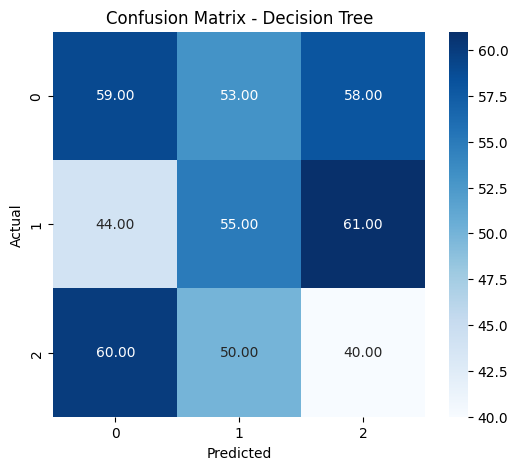

In [ ]:
# Decision Tree
cmDT = confusion_matrix(yTest, ypredDT)

# Plotting the confusion matrix for Decision Tree
plt.figure(figsize=(6, 5))
sns.heatmap(cmDT, annot=True, fmt='.2f', cmap='Blues')

plt.title("Confusion Matrix - Decision Tree")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

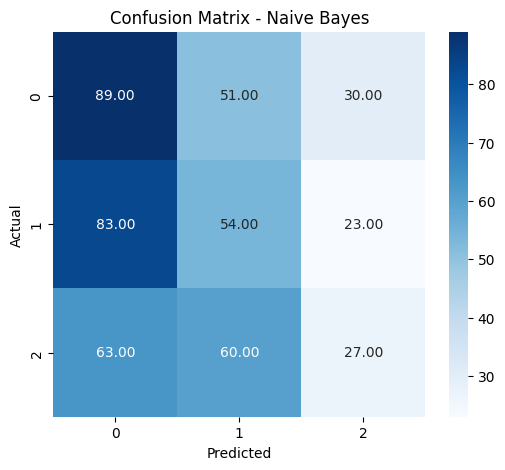

In [ ]:
# Naive Bayes
cmNB = confusion_matrix(yTest, ypredNB)

# Plotting the confusion matrix for Naive Bayes
plt.figure(figsize=(6, 5))
sns.heatmap(cmNB, annot=True, fmt='.2f', cmap='Blues')

plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

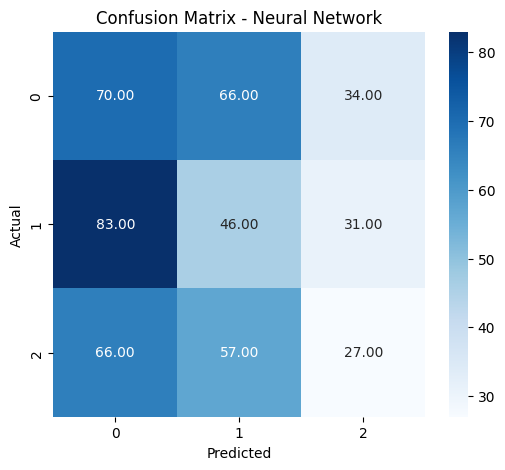

In [ ]:
# Neural Network
cmNN = confusion_matrix(yTest, y_pred_NN)

# Plotting the confusion matrix for Neural Network
plt.figure(figsize=(6, 5))
sns.heatmap(cmNN, annot=True, fmt='.2f', cmap='Blues')

plt.title("Confusion Matrix - Neural Network")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## AUC score, ROC curve

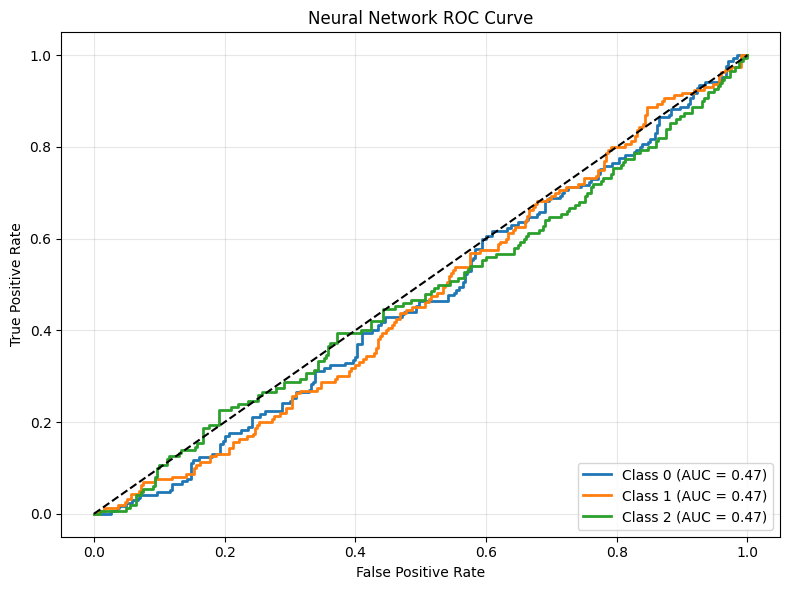

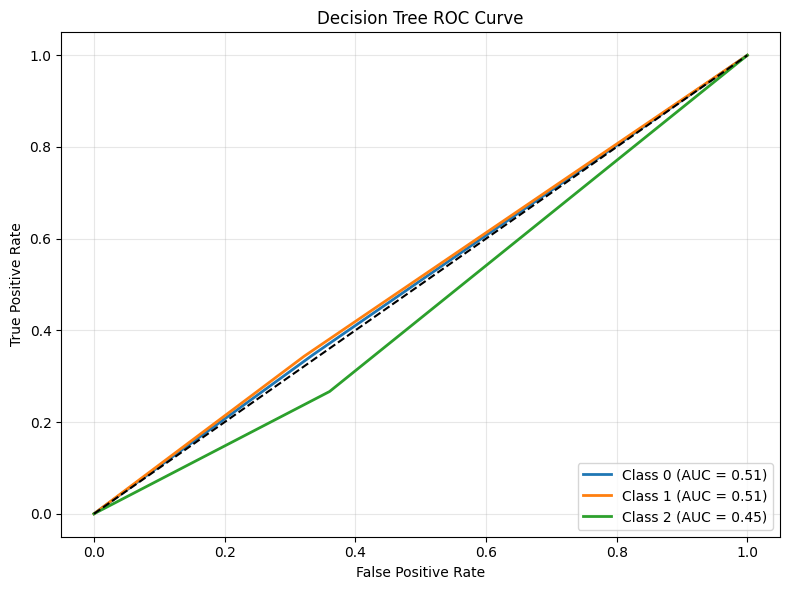

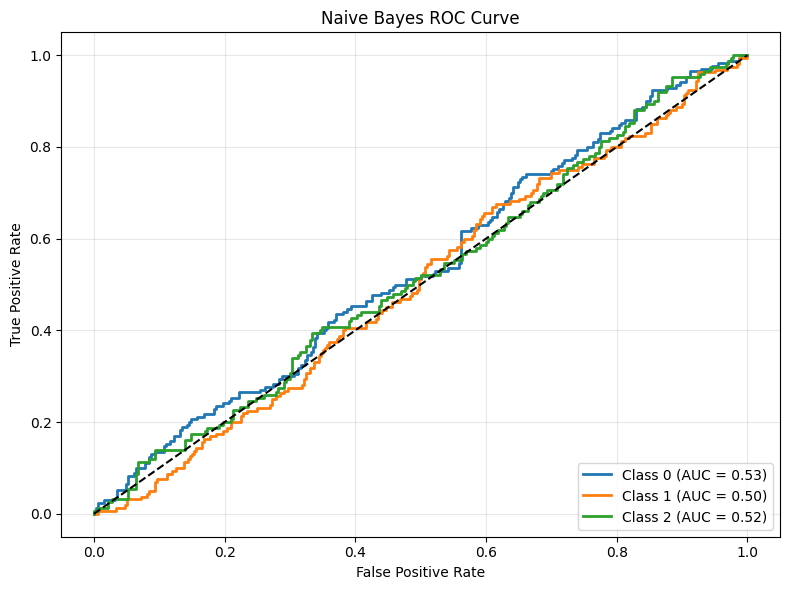

📈 Average AUC:
  Neural Network : 0.4698 (46.98%)
  Decision Tree  : 0.4899 (48.99%)
  Naive Bayes    : 0.5174 (51.74%)


In [ ]:
# Binarize yTest for ROC (auto-detect classes)
classes = np.unique(yTest)
y_test_bin = label_binarize(yTest, classes=classes)
n_classes = y_test_bin.shape[1]

def plot_roc_auc(model, model_name, x_test, y_test_bin, classes):
    # Probabilities/scores
    if model_name == "Neural Network":
        y_score = model.predict(x_test, verbose=0)  # softmax/sigmoid probs
        y_score = np.asarray(y_score)
        # If sigmoid (binary) -> ensure shape (n,2)
        if y_score.ndim == 1 or (y_score.ndim == 2 and y_score.shape[1] == 1):
            y_score = np.column_stack([1 - y_score.reshape(-1), y_score.reshape(-1)])
    else:
        y_score = model.predict_proba(x_test)

    # If model exposes classes_, align column order to `classes`
    if hasattr(model, "classes_") and model_name != "Neural Network":
        order = [np.where(model.classes_ == c)[0][0] for c in classes]
        y_score = y_score[:, order]

    # Per-class ROC
    fpr, tpr, roc_auc = {}, {}, {}
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot per-class curves
    plt.figure(figsize=(8, 6))
    for i, cls in enumerate(classes):
        plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {cls} (AUC = {roc_auc[i]:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', lw=1.5)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"{model_name} ROC Curve")
    plt.legend(loc="lower right")
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Macro AUC (OvR)
    macro_auc = roc_auc_score(y_test_bin, y_score, average="macro", multi_class="ovr")
    return macro_auc

# === Run for your three models ===
nn_auc   = plot_roc_auc(modelNN,   "Neural Network", xTest, y_test_bin, classes)
dt_auc   = plot_roc_auc(modelDT, "Decision Tree",  xTest, y_test_bin, classes)
nb_auc   = plot_roc_auc(modelNB, "Naive Bayes",    xTest, y_test_bin, classes)

# Final AUC comparison
print("📈 Average AUC:")
print(f"  Neural Network : {nn_auc:.4f} ({nn_auc*100:.2f}%)")
print(f"  Decision Tree  : {dt_auc:.4f} ({dt_auc*100:.2f}%)")
print(f"  Naive Bayes    : {nb_auc:.4f} ({nb_auc*100:.2f}%)")